# Financial Market Concepts
CAPM (almost like simple linear regression)

In [1]:
from scipy import stats

In [3]:
#help(stats.linregress)

In [28]:
import pandas as pd
import pandas_datareader as web
import numpy as np

In [6]:
spy_etf = web.DataReader('SPY','yahoo')

In [7]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-03-14 to 2021-03-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [10]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2021-03-11')

In [30]:
aapl = web.DataReader('AAPL','yahoo',start,end)
spy_etf = web.DataReader('SPY','yahoo',start,end)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

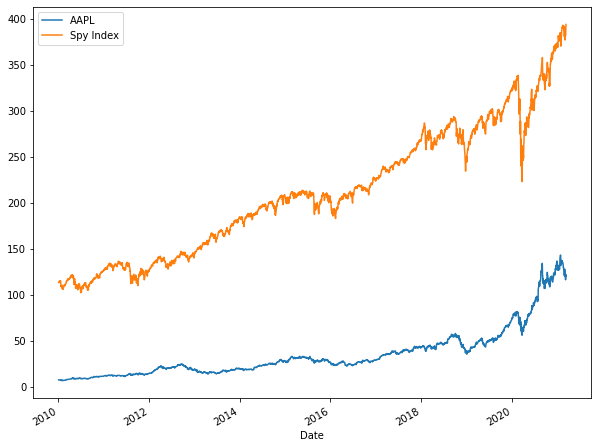

In [32]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='Spy Index')
plt.legend()

In [33]:
# Cumulative Returns from first day to last
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

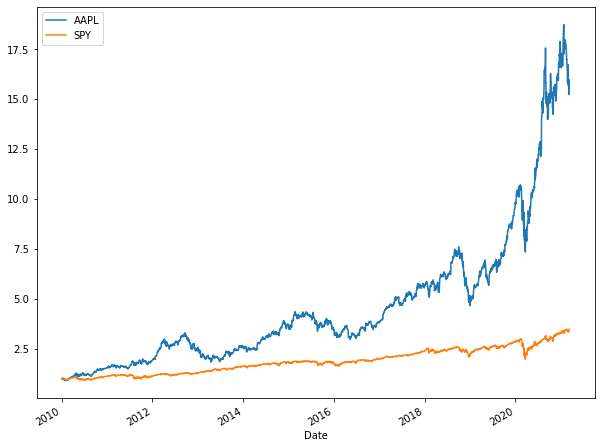

In [34]:
aapl['Cumulative'].plot(label='AAPL',figsize = (10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [35]:
# daily returns
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return']  = spy_etf['Close'].pct_change(1)


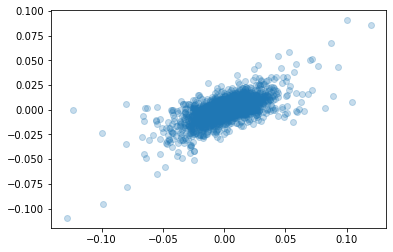

In [36]:
# looks like some relationsship
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25)

In [39]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [40]:
beta # moves alog with the market 40% of the time... (coefficent)

0.40101229689198725

In [41]:
alpha # close to 0 intercept...

4.278496975212092e-05

In [42]:
r_value # 65% accurate decent fit

0.6591675285474219

In [43]:
# Make simulated data that is inline with spy
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [44]:
noise

array([-8.50429944e-05,  5.37697249e-04,  7.96877586e-04, ...,
       -2.92607654e-03, -4.03719883e-04, -4.20148654e-04])

In [47]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise
fake_stock

Date
2010-01-05    0.002562
2010-01-06    0.001242
2010-01-07    0.005018
2010-01-08    0.001893
2010-01-11    0.000320
                ...   
2021-03-05    0.018975
2021-03-08   -0.005657
2021-03-09    0.011351
2021-03-10    0.005821
2021-03-11    0.009719
Name: Daily Return, Length: 2815, dtype: float64

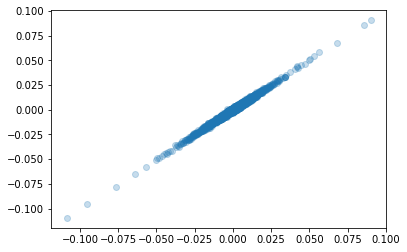

In [50]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [52]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [53]:
beta

0.9960230495683119

In [54]:
alpha # WE WANT A SYSTEM THAT GIVES STRONGER ALPHA VALUE!!!!!!!!!!!!!!!

2.38804758989897e-05

In [55]:
r_value # makes sense because this is inline with what we compared it to (made from it)

0.9957168911726518

In [ ]:
# use adjusted high close or open because stock splits and dividends affect price in algorithm